### Loading Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

### Loading Datasets

In [3]:
data = pd.read_csv('merged_nhanes_2007_2008.csv')

### Understanding Dataset

In [5]:
data.shape

(4438, 21)

In [6]:
list(data.columns.values)

['SEQN',
 'LBXGLU',
 'LBXIN',
 'LBXSBU',
 'LBXSCR',
 'URDACT',
 'URXUMA',
 'URXUCR',
 'SMQ020',
 'SMQ040',
 'ALQ111',
 'ALQ121',
 'ALQ130',
 'RIAGENDR',
 'RIDAGEYR',
 'DMDEDUC2',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ050',
 'DIQ070']

In [7]:
unique_SEQN_count = data['SEQN'].nunique()
print("Number of unique IDs:", unique_SEQN_count)

Number of unique IDs: 4438


In [8]:
print(data.head())

       SEQN  LBXGLU  LBXIN  LBXSBU  LBXSCR  URDACT  URXUMA  URXUCR  SMQ020  \
0  109271.0   103.0  16.96     8.0    0.78    7.50     2.4    32.0     1.0   
1  109274.0   154.0  13.52    11.0    0.74   10.67    12.8   120.0     2.0   
2  109282.0    95.0   7.49    18.0    0.88    8.33    16.0   192.0     1.0   
3  109286.0    92.0  16.46     9.0    0.55    9.19     6.8    74.0     2.0   
4  109290.0   106.0  20.25    18.0    0.69    8.24    22.4   272.0     2.0   

   SMQ040  ...  ALQ121  ALQ130  RIAGENDR  RIDAGEYR  DMDEDUC2  INDFMPIR  \
0     1.0  ...     0.0     NaN       1.0      49.0       2.0       NaN   
1     NaN  ...     4.0     2.0       1.0      68.0       4.0      1.20   
2     3.0  ...     0.0     NaN       1.0      76.0       5.0      3.61   
3     NaN  ...     NaN     NaN       2.0      33.0       5.0      1.36   
4     NaN  ...     0.0     NaN       2.0      68.0       5.0      5.00   

   DIQ010  DID040  DIQ050  DIQ070  
0     2.0     NaN     NaN     NaN  
1     1.0    5

In [19]:
import pandas as pd

def create_data_dictionary(data):
    data_dict = {
        "Feature Name": [],
        "Data Type": [],
        "Missing Values": [],
        "Unique Values": [],
        "Description": [],
    }

    # Feature descriptions for your current dataset
    feature_descriptions = {
        "SEQN": "Respondent sequence number (unique ID for each participant)",
        "LBXGLU": "Fasting glucose (mg/dL)",
        "LBXIN": "Fasting insulin (μU/mL)",
        "LBXSBU": "Blood urea nitrogen (BUN) (mg/dL), marker of kidney function",
        "LBXSCR": "Serum creatinine (mg/dL), used to assess kidney function",
        "URDACT": "Urine albumin-to-creatinine ratio (mg/g), marker of early kidney damage",
        "URXUMA": "Urine albumin (μg/mL)",
        "URXUCR": "Urine creatinine (mg/dL)",
        "SMQ020": "Ever smoked at least 100 cigarettes in life (1 = Yes, 2 = No)",
        "SMQ040": "Current smoking status (1 = Every day, 2 = Some days, 3 = Not at all)",
        "ALQ111": "Ever had at least one alcoholic drink (1 = Yes, 2 = No)",
        "ALQ121": "Drinking frequency over past 12 months",
        "ALQ130": "Average number of alcoholic drinks per day (past 12 months)",
        "RIAGENDR": "Gender (1 = Male, 2 = Female)",
        "RIDAGEYR": "Age in years at time of screening",
        "DMDEDUC2": "Education level (1 = Less than 9th grade to 5 = College graduate or above)",
        "INDFMPIR": "Ratio of family income to poverty level (higher = higher income)",
        "DIQ010": "Doctor told you have diabetes (1 = Yes, 2 = No)",
        "DID040": "Age when first told you had diabetes",
        "DIQ050": "Currently taking insulin (1 = Yes, 2 = No)",
        "DIQ070": "Currently taking pills to lower blood sugar (1 = Yes, 2 = No)"
    }

    # Loop through each column in the DataFrame
    for column in data.columns:
        data_dict["Feature Name"].append(column)
        data_dict["Data Type"].append(data[column].dtype)
        data_dict["Missing Values"].append(data[column].isnull().sum())
        data_dict["Unique Values"].append(data[column].nunique())
        data_dict["Description"].append(feature_descriptions.get(column, "No description available"))

    return pd.DataFrame(data_dict)
# Optional: remove a column if it exists
data = data.drop(columns=['Calculated_Diff'], errors='ignore')

# Create and view the data dictionary
data_dict_df = create_data_dictionary(data)
data_dict_df

,Feature Name,Data Type,Missing Values,Unique Values,Description
0,SEQN,float64,0,4438,Respondent sequence number (unique ID for each...
1,LBXGLU,float64,265,238,Fasting glucose (mg/dL)
2,LBXIN,float64,359,2106,Fasting insulin (μU/mL)
3,LBXSBU,float64,346,57,"Blood urea nitrogen (BUN) (mg/dL), marker of k..."
4,LBXSCR,float64,344,186,"Serum creatinine (mg/dL), used to assess kidne..."
5,URDACT,float64,99,2022,"Urine albumin-to-creatinine ratio (mg/g), mark..."
6,URXUMA,float64,99,852,Urine albumin (μg/mL)
7,URXUCR,float64,99,407,Urine creatinine (mg/dL)
8,SMQ020,float64,0,4,Ever smoked at least 100 cigarettes in life (1...
9,SMQ040,float64,2610,3,"Current smoking status (1 = Every day, 2 = Som..."


In [20]:
data['DID040'].isnull().sum()

3746

In [21]:
data.info()
data.describe()

missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4438 entries, 0 to 4437
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      4438 non-null   float64
 1   LBXGLU    4173 non-null   float64
 2   LBXIN     4079 non-null   float64
 3   LBXSBU    4092 non-null   float64
 4   LBXSCR    4094 non-null   float64
 5   URDACT    4339 non-null   float64
 6   URXUMA    4339 non-null   float64
 7   URXUCR    4339 non-null   float64
 8   SMQ020    4438 non-null   float64
 9   SMQ040    1828 non-null   float64
 10  ALQ111    4165 non-null   float64
 11  ALQ121    3759 non-null   float64
 12  ALQ130    2906 non-null   float64
 13  RIAGENDR  4438 non-null   float64
 14  RIDAGEYR  4438 non-null   float64
 15  DMDEDUC2  4252 non-null   float64
 16  INDFMPIR  3808 non-null   float64
 17  DIQ010    4438 non-null   float64
 18  DID040    692 non-null    float64
 19  DIQ050    693 non-null    float64
 20  DIQ070    1263 non-null   floa

In [22]:
df = data[data['DIQ010'].isin([1, 2])].copy()
print("Rows after filtering valid diabetes status:", df.shape[0])

Rows after filtering valid diabetes status: 4307


In [23]:
t2d_counts = df['DIQ010'].value_counts().rename(index={1: 'Has Diabetes', 2: 'No Diabetes'})
print("\nNumber of participants by diabetes status:")
print(t2d_counts)


Number of participants by diabetes status:
No Diabetes     3614
Has Diabetes     693
Name: DIQ010, dtype: int64


In [24]:
def is_likely_type1(row):
    return (
        row['DIQ010'] == 1 and
        pd.notnull(row['DID040']) and row['DID040'] < 30 and
        row['DIQ050'] == 1 and
        (row['DIQ070'] == 2 or pd.isnull(row['DIQ070']))
    )

# Flag and remove likely type 1 cases
df['likely_type1'] = df.apply(is_likely_type1, axis=1)
print(f"Likely Type 1 cases flagged: {df['likely_type1'].sum()}")

# Keep everyone except those flagged
df = df[~df['likely_type1']].copy()
print("Final dataset size after removing likely T1D:", df.shape[0])

Likely Type 1 cases flagged: 16
Final dataset size after removing likely T1D: 4291


In [25]:
t2d_count = df[df['DIQ010'] == 1].shape[0]
print(f"Number of Type 2 Diabetes cases: {t2d_count}")

Number of Type 2 Diabetes cases: 677


In [28]:
df.describe()

,SEQN,FastingGlucose,FastingInsulin,BUN,SerumCreatinine,ACR,UrineAlbumin,UrineCreatinine,EverSmoked100,CurrentSmoker,...,DrinkFrequency,AvgDrinksPerDay,Gender,Age,Education,IncomeToPovertyRatio,HasDiabetes,DID040,DIQ050,DIQ070
count,4291.000000,4033.000000,3943.000000,3952.000000,3954.000000,4192.000000,4192.000000,4192.000000,4291.000000,1760.000000,...,3635.000000,2827.000000,4291.000000,4291.000000,4109.000000,3687.000000,4291.000000,676.000000,677.000000,1118.000000
mean,117168.010254,112.488222,14.982594,14.713310,0.892999,53.618001,55.853986,137.316555,1.594267,2.213068,...,4.852820,3.592855,1.519692,49.412025,3.529569,2.559729,1.842228,62.538462,1.722304,1.531306
std,4497.777159,37.122978,24.039773,6.008098,0.519293,363.859963,335.649990,86.044812,0.523708,0.921939,...,3.499912,32.514651,0.499670,18.306275,1.211320,1.616804,0.364570,109.600041,0.448194,0.591195
min,109271.000000,47.000000,0.710000,2.000000,0.300000,1.040000,0.210000,7.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,18.000000,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000
25%,113321.000000,95.000000,6.140000,11.000000,0.700000,4.830000,5.200000,74.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,33.500000,3.000000,1.180000,2.000000,40.000000,1.000000,1.000000
50%,117230.000000,103.000000,9.960000,14.000000,0.830000,7.590000,9.600000,123.000000,2.000000,3.000000,...,5.000000,2.000000,2.000000,50.000000,4.000000,2.190000,2.000000,50.000000,2.000000,2.000000
75%,121070.000000,114.000000,16.485000,17.000000,0.990000,14.552500,19.925000,183.000000,2.000000,3.000000,...,8.000000,3.000000,2.000000,64.000000,4.000000,4.095000,2.000000,59.000000,2.000000,2.000000
max,124822.000000,421.000000,512.500000,79.000000,14.970000,9404.760000,8080.000000,739.000000,9.000000,3.000000,...,10.000000,999.000000,2.000000,80.000000,9.000000,5.000000,2.000000,999.000000,2.000000,9.000000


In [27]:
df = df.rename(columns={
    'LBXGLU': 'FastingGlucose',
    'LBXIN': 'FastingInsulin',
    'LBXSBU': 'BUN',
    'LBXSCR': 'SerumCreatinine',
    'URDACT': 'ACR',
    'URXUMA': 'UrineAlbumin',
    'URXUCR': 'UrineCreatinine',
    'SMQ020': 'EverSmoked100',
    'SMQ040': 'CurrentSmoker',
    'ALQ111': 'EverDrank',
    'ALQ121': 'DrinkFrequency',
    'ALQ130': 'AvgDrinksPerDay',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'DMDEDUC2': 'Education',
    'INDFMPIR': 'IncomeToPovertyRatio',
    'DIQ010': 'HasDiabetes'
})

In [29]:
df.shape

(4291, 22)

In [31]:
df_t2d = df[df['HasDiabetes'] == 1].copy()
print(f"Number of participants with Type 2 Diabetes: {df_t2d.shape[0]}")

Number of participants with Type 2 Diabetes: 677


In [32]:
df_t2d['T2D'] = 1 
df_t2d.shape

(677, 23)

### Handeling Missing Values

In [33]:
missing_values = df_t2d.isnull().sum()
missing_percent = (missing_values / len(df_t2d)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing data summary:
                      Missing Values  Missing %
FastingGlucose                    36       5.32
FastingInsulin                    52       7.68
BUN                               52       7.68
SerumCreatinine                   52       7.68
ACR                               25       3.69
UrineAlbumin                      25       3.69
UrineCreatinine                   25       3.69
CurrentSmoker                    335      49.48
EverDrank                         46       6.79
DrinkFrequency                   106      15.66
AvgDrinksPerDay                  322      47.56
Education                          1       0.15
IncomeToPovertyRatio             106      15.66
DID040                             1       0.15


In [34]:
df_t2d[['EverDrank', 'DrinkFrequency', 'AvgDrinksPerDay']].value_counts(dropna=False)

EverDrank  DrinkFrequency  AvgDrinksPerDay
1.0        0.0             NaN                216
2.0        NaN             NaN                 60
NaN        NaN             NaN                 46
1.0        10.0            1.0                 43
           9.0             1.0                 33
                                             ... 
           4.0             7.0                  1
           3.0             8.0                  1
                           5.0                  1
           2.0             6.0                  1
           6.0             4.0                  1
Length: 69, dtype: int64

In [35]:
# Set alcohol frequency/amount to 0 for those who never drank
df_t2d.loc[df_t2d['EverDrank'] == 2, ['DrinkFrequency', 'AvgDrinksPerDay']] = 0

# Set drink amount to 0 for rare drinkers (e.g., frequency 0)
df_t2d.loc[(df_t2d['EverDrank'] == 1) & (df_t2d['DrinkFrequency'] == 0), 'AvgDrinksPerDay'] = 0

# Fill truly missing EverDrank with "non-drinker" (or 0)
df_t2d['EverDrank'] = df_t2d['EverDrank'].fillna(2)
df_t2d['DrinkFrequency'] = df_t2d['DrinkFrequency'].fillna(0)
df_t2d['AvgDrinksPerDay'] = df_t2d['AvgDrinksPerDay'].fillna(0)

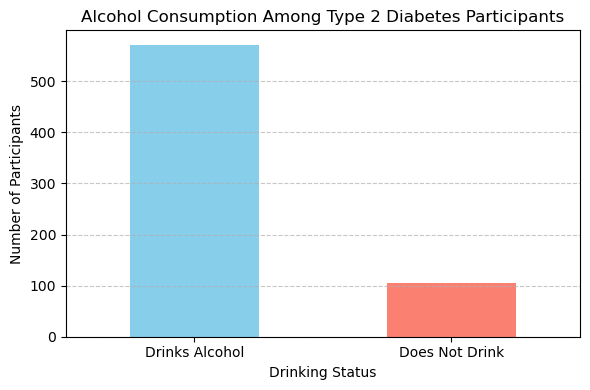

In [36]:
df_t2d['EverDrank_Label'] = df_t2d['EverDrank'].map({1: 'Drinks Alcohol', 2: 'Does Not Drink'})
drink_counts = df_t2d['EverDrank_Label'].value_counts()
plt.figure(figsize=(6, 4))
drink_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Alcohol Consumption Among Type 2 Diabetes Participants')
plt.ylabel('Number of Participants')
plt.xlabel('Drinking Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
missing_values = df_t2d.isnull().sum()
missing_percent = (missing_values / len(df_t2d)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing data summary:
                      Missing Values  Missing %
FastingGlucose                    36       5.32
FastingInsulin                    52       7.68
BUN                               52       7.68
SerumCreatinine                   52       7.68
ACR                               25       3.69
UrineAlbumin                      25       3.69
UrineCreatinine                   25       3.69
CurrentSmoker                    335      49.48
Education                          1       0.15
IncomeToPovertyRatio             106      15.66
DID040                             1       0.15


In [38]:
df_t2d['FastingGlucose'] = df_t2d['FastingGlucose'].fillna(df_t2d['FastingGlucose'].median())

In [39]:
df_t2d['FastingInsulin'] = df_t2d['FastingInsulin'].fillna(df_t2d['FastingInsulin'].median())

In [40]:
df_t2d['BUN'] = df_t2d['BUN'].fillna(df_t2d['BUN'].median())
df_t2d['SerumCreatinine'] = df_t2d['SerumCreatinine'].fillna(df_t2d['SerumCreatinine'].median())

In [41]:
df_t2d['ACR'] = df_t2d['ACR'].fillna(df_t2d['ACR'].median())

ACR (Urine Albumin-to-Creatinine Ratio) is calculated using Urine Albumin and Urine Creatinine.

In [42]:
df_t2d.drop(columns=['UrineAlbumin', 'UrineCreatinine'], inplace=True)

In [43]:
df_t2d.loc[(df_t2d['CurrentSmoker'].isnull()) & (df_t2d['EverSmoked100'] == 2), 'CurrentSmoker'] = 'Not at all'
df_t2d['CurrentSmoker'] = df_t2d['CurrentSmoker'].fillna('Missing')

In [44]:
df_t2d['Education'] = df_t2d['Education'].fillna(df_t2d['Education'].mode()[0])

In [45]:
df_t2d['IncomeMissing'] = df_t2d['IncomeToPovertyRatio'].isnull().astype(int)
df_t2d['IncomeToPovertyRatio'] = df_t2d['IncomeToPovertyRatio'].fillna(df_t2d['IncomeToPovertyRatio'].median())

We already kept patients over 30 that have diabetes so I'm going to drop DID040.

In [46]:
df_t2d.drop(columns=['DID040'], inplace=True)

In [47]:
missing_values = df_t2d.isnull().sum()
missing_percent = (missing_values / len(df_t2d)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing data summary:
Empty DataFrame
Columns: [Missing Values, Missing %]
Index: []


### Feature Engineering

In [48]:
df_t2d['HOMA_B'] = (20 * df_t2d['FastingInsulin']) / (df_t2d['FastingGlucose'] - 3.5)

We create other features if we see it fit.

In [50]:
categorical_cols = df_t2d.select_dtypes(include='object').columns
print(categorical_cols)

df_t2d = pd.get_dummies(df_t2d, columns=categorical_cols, drop_first=True)

Index(['CurrentSmoker', 'EverDrank_Label'], dtype='object')


In [57]:
df_t2d['IncomeToPovertyRatio'].describe()

count    677.000000
mean       2.330990
std        1.441264
min        0.000000
25%        1.270000
50%        1.930000
75%        3.160000
max        5.000000
Name: IncomeToPovertyRatio, dtype: float64

In [53]:
scale_cols = ['FastingGlucose', 'FastingInsulin', 'BUN', 'SerumCreatinine', 'ACR', 'HOMA_B']

scaler = StandardScaler()
df_t2d[scale_cols] = scaler.fit_transform(df_t2d[scale_cols])

In [54]:
print(df_t2d.dtypes)

SEQN                              float64
FastingGlucose                    float64
FastingInsulin                    float64
BUN                               float64
SerumCreatinine                   float64
ACR                               float64
EverSmoked100                     float64
EverDrank                         float64
DrinkFrequency                    float64
AvgDrinksPerDay                   float64
Gender                            float64
Age                               float64
Education                         float64
IncomeToPovertyRatio              float64
HasDiabetes                       float64
DIQ050                            float64
DIQ070                            float64
likely_type1                         bool
T2D                                 int64
IncomeMissing                       int64
HOMA_B                            float64
CurrentSmoker_2.0                   uint8
CurrentSmoker_3.0                   uint8
CurrentSmoker_Missing             

In [59]:
df_t2d.describe()

,SEQN,FastingGlucose,FastingInsulin,BUN,SerumCreatinine,ACR,EverSmoked100,EverDrank,DrinkFrequency,AvgDrinksPerDay,...,DIQ050,DIQ070,T2D,IncomeMissing,HOMA_B,CurrentSmoker_2.0,CurrentSmoker_3.0,CurrentSmoker_Missing,CurrentSmoker_Not at all,EverDrank_Label_Drinks Alcohol
count,677.000000,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,677.000000,677.000000,677.000000,677.000000,...,677.000000,677.000000,677.0,677.000000,6.770000e+02,677.000000,677.000000,677.000000,677.000000,677.000000
mean,117359.988183,-9.052335e-17,1.206978e-16,-1.134822e-16,-1.102023e-16,-2.099092e-17,1.512555,1.156573,3.559823,1.323486,...,1.722304,1.258493,1.0,0.156573,2.099092e-17,0.033973,0.338257,0.002954,0.491876,0.843427
std,4649.656019,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,0.614354,0.363667,3.905850,2.141502,...,0.448194,0.524212,0.0,0.363667,1.000739e+00,0.181295,0.473466,0.054312,0.500304,0.363667
min,109274.000000,-1.745589e+00,-5.111909e-01,-1.645338e+00,-6.953589e-01,-2.326467e-01,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.0,0.000000,-4.329206e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113262.000000,-6.524511e-01,-3.469068e-01,-5.718780e-01,-3.218238e-01,-2.255894e-01,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.0,0.000000,-3.097987e-01,0.000000,0.000000,0.000000,0.000000,1.000000
50%,117310.000000,-2.935102e-01,-2.492076e-01,-2.140578e-01,-1.661842e-01,-2.167054e-01,1.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,1.0,0.000000,-2.110643e-01,0.000000,0.000000,0.000000,0.000000,1.000000
75%,121644.000000,2.775321e-01,-5.816511e-02,2.630357e-01,4.133531e-02,-1.703528e-01,2.000000,1.000000,7.000000,2.000000,...,2.000000,1.000000,1.0,0.000000,-5.604316e-02,0.000000,1.000000,0.000000,1.000000,1.000000
max,124803.000000,3.964834e+00,1.010484e+01,7.300165e+00,1.446394e+01,1.149074e+01,9.000000,2.000000,10.000000,15.000000,...,2.000000,9.000000,1.0,1.000000,1.179835e+01,1.000000,1.000000,1.000000,1.000000,1.000000


### Unscaling the Features (for now)

In [63]:
# Inverse transform only the scaled columns
df_t2d[scale_cols] = scaler.inverse_transform(df_t2d[scale_cols])

In [67]:
df_t2d.to_csv('cleaned_dataset.csv', index=False)